In [ ]:
with open("somefile.py") as f:
    code = compile(f.read(), "somefile.py", 'exec')
    exec(code, global_vars, local_vars)

In [13]:
from __future__ import division
import colorsys
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def linspace(a, b, num):
    dif = float(b - a) / (num - 1)
    for i in range(num - 1):
        yield a
        a += dif
    yield b


In [168]:

def color_range(num, hue, sat=0.5):
    """
    Generator for a series of num RGB tuples, derived from the color provided in hue.  
    If hue is a 2-tuple, provides a gradation from [0] to [1]. Uses either hsv or hsl to rgb.
    """
    if not isinstance(hue, tuple):
        hue = (hue, hue)
    h = linspace(hue[0], hue[1], num)
    v = linspace(0.95, 0.45, num)
    for i in range(num):
        yield colorsys.hsv_to_rgb(next(h), sat, next(v))

In [170]:
def create_fig(num_bars):
    fig = plt.figure(figsize=(15, (num_bars + 1) * 0.6))
    ax = fig.add_subplot(111)
    return ax

def _label_bar(patch, label, format='%6.3g'):
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    y = 0.5 * patch.get_height() + bl[1]
    patch.axes.text(x, y, format % label, ha='center')
    

def draw_bar(ax, data, hue, title='blurg', units='-'):
    
    patch_handles = []
    left = 0.0
    colors = color_range(len(data), hue)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for d in data:
        patch = ax.barh(1, d, color=next(colors), align='center', left=left, height=0.6)
        patch_handles.append(patch)
        _label_bar(patch[0], d)
        left += d
        
    ax.set_yticks([1])
    ax.set_xlabel(title)
    ax.set_xlim(0, left * 1.08)
    ax.text(left, 1, '%6.3g [%s]' % (left, units), ha='left', fontsize=16, fontweight='bold')
    
    ax.legend(['voo', 'bar','baz', 'q'], loc='upper left', bbox_to_anchor=(0, -0.2))
    
    return patch_handles

In [156]:
help(f.legend)

Help on method legend in module matplotlib.axes._axes:

legend(*args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.

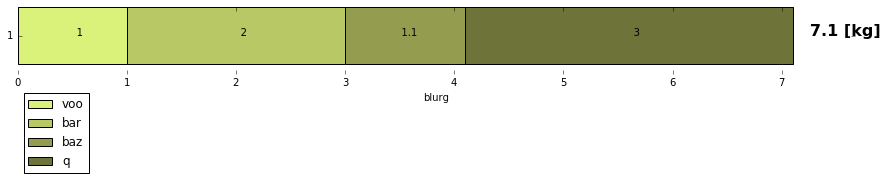

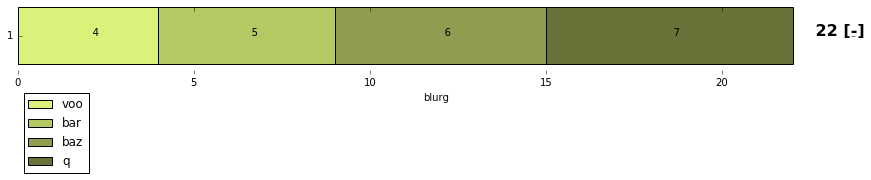

In [172]:

f1 = create_fig(1)
f2 = create_fig(1)
draw_bar(f2, [4, 5, 6, 7], .2)
ph = draw_bar(f1, [1, 2, 1.1, 3], (.2, .18), units='kg')
plt.show()

In [130]:
ph[0].get_children()[0].axes

In [109]:
f.get_children()

In [60]:
help(ax.text)

Help on method text in module matplotlib.axes._axes:

text(x, y, s, fontdict=None, withdash=False, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Add text to the axes.
    
    Add text in string `s` to axis at location `x`, `y`, data
    coordinates.
    
    Parameters
    ----------
    x, y : scalars
        data coordinates
    
    s : string
        text
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Other parameters
    ----------------
    kwargs : `~matplotlib.text.Text` properties.
        Other miscellaneous text parameters.
    
    Examples
    --------
    Individual keyword arguments can be used to override any given
    par

In [79]:
f.text(3, 1, 'fff')

In [80]:
plt.show()

In [47]:
f.barh(0.5, 4)


<Container object of 1 artists>

In [50]:
plt.show()

In [41]:
draw_bar(f, [1, 2, 1, 3], .4)

UnboundLocalError: local variable 'y' referenced before assignment

In [18]:
next(4)

TypeError: 'int' object is not an iterator

In [3]:
%matplotlib inline

In [178]:
def col(hashable):
    h = hash(hashable) / 1e6
    return h - int(h)

In [182]:
col('Bbb')

0.421875

In [174]:
sorted([0, -1, float('nan'), 1,  2])

[-1, 0, nan, 1, 2]

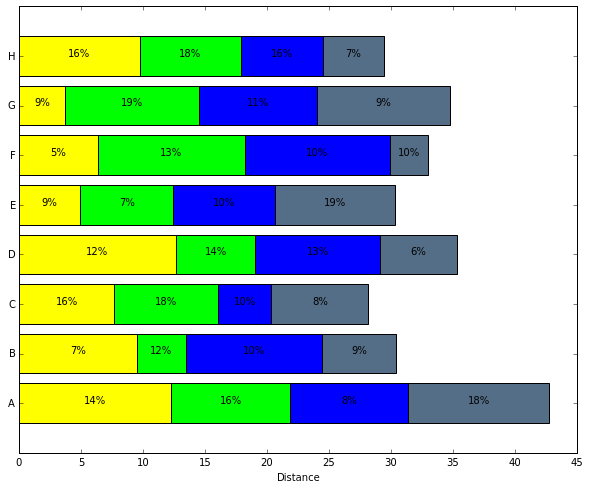

In [11]:
  
people = ('A','B','C','D','E','F','G','H')
segments = 4

# generate some multi-dimensional data & arbitrary labels
data = 3 + 10* np.random.rand(segments, len(people))
percentages = (np.random.randint(5,20, (len(people), segments)))
y_pos = np.arange(len(people))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors =((1, 1, 0), (0, 1, 0), (0, 0, 1), (0.33, 0.43, 0.53))
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i % len(colors)], align='center', 
      left=left)) 
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Distance')

plt.show()